# AirBnB Seattle Projects - Key Questions

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
# Import data
calendar = pickle.load(open('../data/pickles/calendar_munged.pkl', 'rb'))
listings = pickle.load(open('../data/pickles/listings_munged.pkl', 'rb'))
reviews = pickle.load(open('../data/pickles/reviews_munged.pkl', 'rb'))

# Key questions we're focusing on in this analysis:
1. What is the overall occupancy trend in Seattle over the course of the year? 
2. Does it pay to be a Superhost? How do the occupancy, prices and reviews of Superhosts compare to normal hosts?
3. What neighborhoods have the highest occupancy rates?

# Q1: What is the overall occupancy trend over the course of the year? 
- Are there periodic shifts in the overall AirBnB occupancy in Seattle over the course of the year and if so what does this look like? This can help the company decide when and how to run promotions of various kinds and to work with hosts to help them get the most out of these time frames. 
- We'll look at the mean of all prices each day over the course of the year.

In [5]:
occupancy_trends = calendar[['date', 'rented']].groupby(['date']).mean().reset_index()
occupancy_trends

date    rented
0   2016-01-04  0.545574
1   2016-01-05  0.511001
2   2016-01-06  0.521739
3   2016-01-07  0.534835
4   2016-01-08  0.533263
..         ...       ...
360 2016-12-29  0.257465
361 2016-12-30  0.256155
362 2016-12-31  0.251179
363 2017-01-01  0.234678
364 2017-01-02  0.272918

[365 rows x 2 columns]

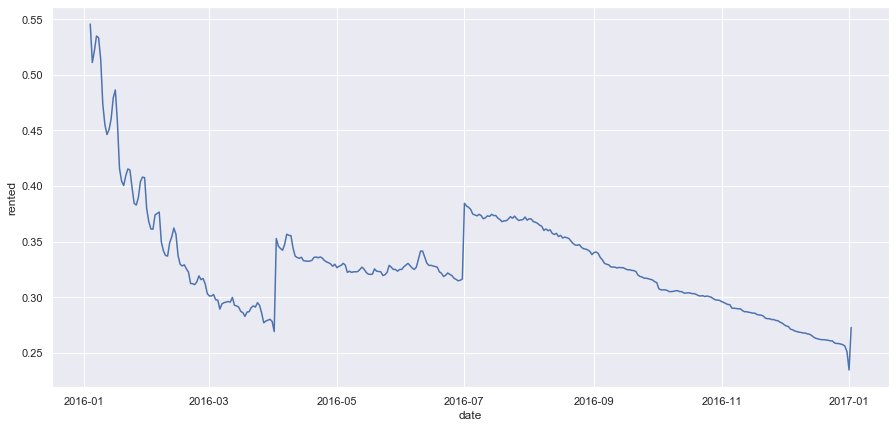

In [6]:
plt.figure(figsize=[15,7])
sns.set_theme(style="darkgrid")
sns.lineplot(x='date', y='rented', data=occupancy_trends);

- The trends here are fairly easy to understand. There are three distinct periods where we see a dramatic buildup of reservations followed by a leveling off. We'll take a closer look at each region.

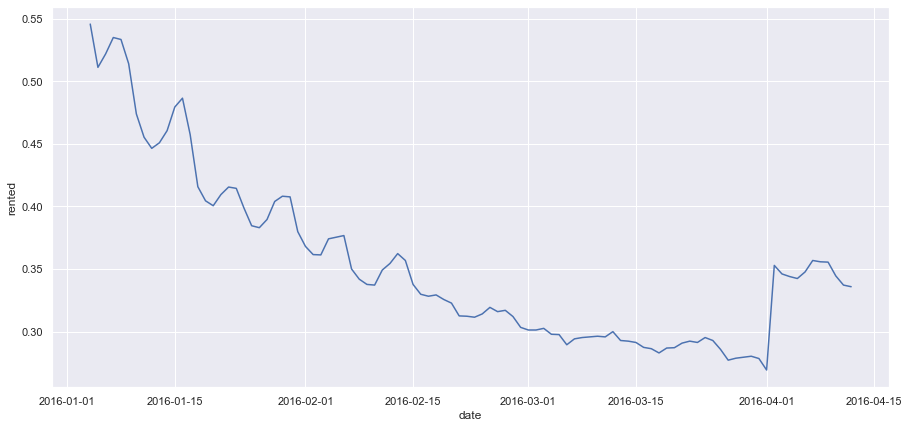

In [7]:
plt.figure(figsize=[15,7])
sns.set_theme(style="darkgrid")
sns.lineplot(x='date', y='rented', data=occupancy_trends.iloc[0:100]);

- **New Year's would appear to be the time we see the greatest spike in occupancy for AirBnB in Seattle**, as occupancy never gets close to that level throughout the rest of the year. 

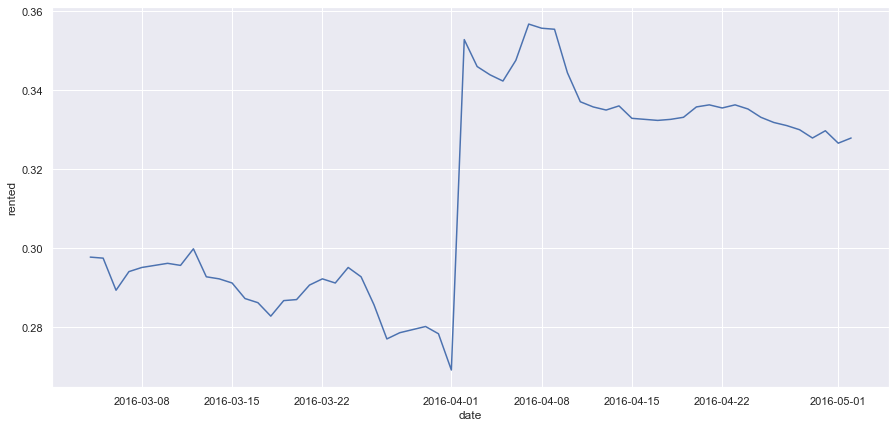

In [8]:
plt.figure(figsize=[15,7])
sns.set_theme(style="darkgrid")
sns.lineplot(x='date', y='rented', data=occupancy_trends.iloc[60:120]);

- This first surge would seem to **correspond to the spring break time frame**.

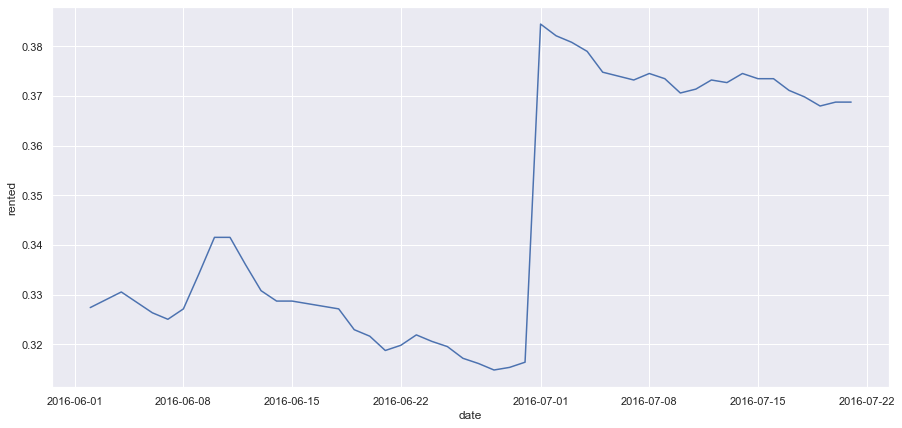

In [9]:
plt.figure(figsize=[15,7])
sns.set_theme(style="darkgrid")
sns.lineplot(x='date', y='rented', data=occupancy_trends.iloc[150:200]);

- This next one corresponds to the **lead into July 4th and summer vacations**.  

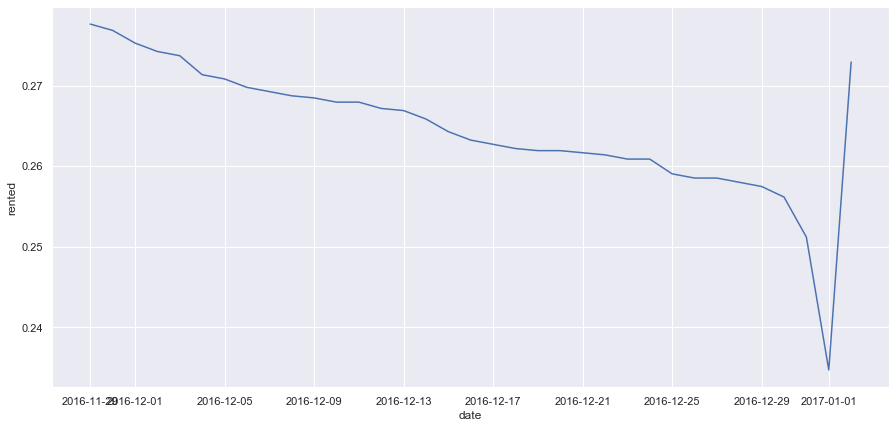

In [10]:
plt.figure(figsize=[15,7])
sns.set_theme(style="darkgrid")
sns.lineplot(x='date', y='rented', data=occupancy_trends.iloc[330:]);

- This last trend is somewhat interesting. **The dramatic spike at the end of the year corresponds to New Year's**, but there is a **pretty dramatic dropoff right before then**. This might mean that during the time between Christmas and New Years people leave their AirBnBs after Christmas to return home and then another group (or maybe part of the same group) vacations in AirBnBs for New Year's celebrations. 

## Occupancy Trends Conclusions
- We have three fairly distinct periods of increased occupancy for AirBnBs in Seattle: spring break, summer/July 4th and New Year's.
- In New Year's we see the highest occupancy of the entire year, with occupancy never rising to that level for the rest of the year. 
- Spring and summer see the highest occupancy outside of New Year's with a spike in spring that stays fairly level and another in summer, afterwhich there's a steady dropoff until New Year's.
- It's important to note that these are only the trends for one year. There may be particular qualities of events and general societal trends for the world, the United States or the Seattle area that may make these trends unique to this year. Only looking at other years and comparing will give us a better idea of overall annual trends, but this is a good starting point. 

# Q2:  Does it pay to be a Superhost? How do the occupancy, prices and reviews of Superhosts compare to normal hosts?
Superhost is a special title that is automatically applied to listings where the host maintains high marks in many areas and has an established positive trend with AirBnB overall. Specifically hosts need to have:  

- Completed at least 10 trips OR completed 3 reservations that total at least 100 nights
- Maintained a 90% response rate or higher
- Maintained a 1% percent cancellation rate (1 cancellation per 100 reservations) or lower, with exceptions made for those that fall under our Extenuating Circumstances policy
- Maintained a 4.8 overall rating (this rating looks at the past 365 days of reviews, based on the date the guest left a review, not the date the guest checked out)  

I'm interested in seeing if there is a correlation between being a superhost and other metrics, such as overall rating/reviews, occupancy, and rental prices. I'll compare these same metrics to non-Superhost listings. 

## Occupancy - How do occupancy rates compare between normal hosts and Superhosts?

In [11]:
calendar_listing_df = listings.merge(calendar, how='inner', left_on='id', right_on='listing_id')
calendar_listing_df

id                          name  \
0          241032  Stylish Queen Anne Apartment   
1          241032  Stylish Queen Anne Apartment   
2          241032  Stylish Queen Anne Apartment   
3          241032  Stylish Queen Anne Apartment   
4          241032  Stylish Queen Anne Apartment   
...           ...                           ...   
1393565  10208623     Large Lakefront Apartment   
1393566  10208623     Large Lakefront Apartment   
1393567  10208623     Large Lakefront Apartment   
1393568  10208623     Large Lakefront Apartment   
1393569  10208623     Large Lakefront Apartment   

                                                   summary  \
0                                                      NaN   
1                                                      NaN   
2                                                      NaN   
3                                                      NaN   
4                                                      NaN   
...                                                    ...   
1393565  All hardwood floors, fireplace, 65" TV with Xb...   
1393566  All hardwood floors, fireplace, 65" TV with Xb...   
1393567  All hardwood floors, fireplace, 65" TV with Xb...   
1393568  All hardwood floors, fireplace, 65" TV with Xb...   
1393569  All hardwood floors, fireplace, 65" TV with Xb...   

                                                     space  \
0        Make your self at home in this charming one-be...   
1        Make your self at home in this charming one-be...   
2        Make your self at home in this charming one-be...   
3        Make your self at home in this charming one-be...   
4        Make your self at home in this charming one-be...   
...                                                    ...   
1393565                                                NaN   
1393566                                                NaN   
1393567                                                NaN   
1393568                                                NaN   
1393569                                                NaN   

                                               description  \
0        Make your self at home in this charming one-be...   
1        Make your self at home in this charming one-be...   
2        Make your self at home in this charming one-be...   
3        Make your self at home in this charming one-be...   
4        Make your self at home in this charming one-be...   
...                                                    ...   
1393565  All hardwood floors, fireplace, 65" TV with Xb...   
1393566  All hardwood floors, fireplace, 65" TV with Xb...   
1393567  All hardwood floors, fireplace, 65" TV with Xb...   
1393568  All hardwood floors, fireplace, 65" TV with Xb...   
1393569  All hardwood floors, fireplace, 65" TV with Xb...   

        experiences_offered neighborhood_overview  \
0                      none                   NaN   
1                      none                   NaN   
2                      none                   NaN   
3                      none                   NaN   
4                      none                   NaN   
...                     ...                   ...   
1393565                none                   NaN   
1393566                none                   NaN   
1393567                none                   NaN   
1393568                none                   NaN   
1393569                none                   NaN   

                                        notes transit  \
0                                         NaN     NaN   
1                                         NaN     NaN   
2                                         NaN     NaN   
3                                         NaN     NaN   
4                                         NaN     NaN   
...                                       ...     ...   
1393565  Also our puppy will be boarded away.     NaN   
1393566  Also our puppy will be boarded away.     NaN   
1393567  Also our

In [12]:
calendar_listing_df['host_is_superhost'].value_counts()

f    1108870
t     283970
Name: host_is_superhost, dtype: int64

## Drop NaNs
Knowing that a value is NaN for Superhost doesn't give me any useful information, at least not for this evaluation, so we'll just drop them. 

In [13]:
calendar_listing_df['host_is_superhost'].isna().sum()

730

In [14]:
calendar_listing_df.dropna(subset=['host_is_superhost'], inplace=True)

## `host_is_superhost` to binary categorical
So we can perform mathematical operations on them.

In [15]:
calendar_listing_df.replace({'host_is_superhost':{'t':1, 'f':0}}, inplace=True)

In [16]:
calendar_listing_df['host_is_superhost'].value_counts()

0    1108870
1     283970
Name: host_is_superhost, dtype: int64

In [17]:
# Change entries to binary categorical
superhost_rented = calendar_listing_df.loc[:, ['host_is_superhost', 'rented']]

## Visualize Occupancy Differences

In [18]:
# Calculate means
normal_occupancy = round(superhost_rented['rented'].loc[calendar_listing_df['host_is_superhost'] == 0].mean(), 4)
superhost_occupancy = round(superhost_rented['rented'].loc[calendar_listing_df['host_is_superhost'] == 1].mean(), 4)

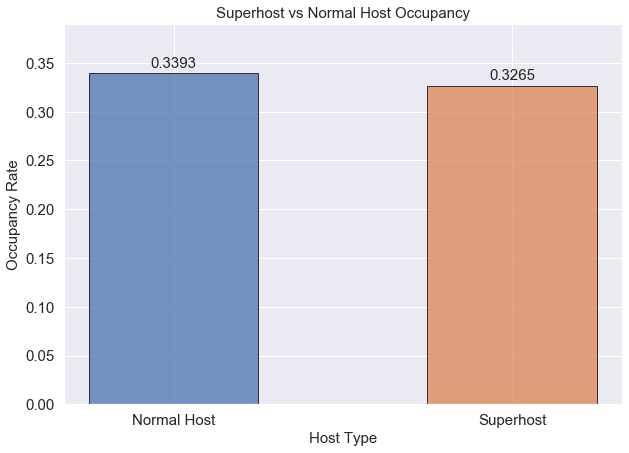

In [19]:
occupancies = [superhost_occupancy, normal_occupancy]
labels = ['Normal Host', 'Superhost']
x = np.arange(len(occupancies))
width = 0.5
fig, ax = plt.subplots(figsize=[10,7])
rects1 = ax.bar(x, 
               occupancies, 
               width, 
               label='Superhost vs Normal Host Occupancy', 
               color=['C0', 'C1'],
               alpha=0.75,
               edgecolor='black')
ax.set_ylabel('Occupancy Rate', fontsize=15)
ax.set_xlabel('Host Type', fontsize=15)
ax.set_title('Superhost vs Normal Host Occupancy', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.margins(y=0.15);


def autolabel(rects):
    """"Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3), # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=15)
autolabel(rects1)

In [20]:
occupancies

[0.3393, 0.3265]

### Occupancy Conclusions
- Interestingly **there really doesn't seem to be much of a difference between normal hosts and Superhosts in terms of their ability to maintain occupancy.** 
- Occupancy rates are actually **slightly higher for normal hosts**, but only by about 1.3\%. This is somewhat counterintuitive, as you would expect superhosts would be in higher demand.  
- This may call into question the efficacy of the Superhost program, but this is only one means of evaluation. Others may reveal advantages for Superhosts.

## Average Rental Price
Given that occupancy rates are roughly the same for both host types, maybe average price of rentals is different between them and this is an area where Superhosts gain an advantage.

In [21]:
list(calendar_listing_df.columns)

['id',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price_x',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_inclu

In [22]:
# Calculate the average price of a rental property between the two groups
host_prices = list(round(calendar_listing_df.loc[:, ['host_is_superhost', 'price_y']].groupby('host_is_superhost').mean(), 2)['price_y'])
host_prices

[135.71, 146.85]

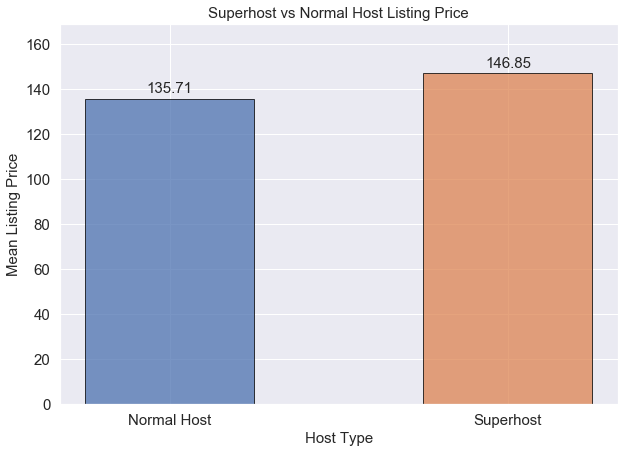

In [23]:
labels = ['Normal Host', 'Superhost']
x = np.arange(len(host_prices))
width = 0.5
fig, ax = plt.subplots(figsize=[10,7])
rects1 = ax.bar(x, 
               host_prices, 
               width, 
               label='Superhost vs Normal Host Listing Prices', 
               color=['C0', 'C1'],
               alpha=0.75,
               edgecolor='black')
ax.set_ylabel('Mean Listing Price', fontsize=15)
ax.set_xlabel('Host Type', fontsize=15)
ax.set_title('Superhost vs Normal Host Listing Price', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.margins(y=0.15);


def autolabel(rects):
    """"Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3), # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=15)
autolabel(rects1)

- Here we see a distinct advantage for Superhosts. **While the Superhost rental rate is slightly lower than normal hosts (-1.3\%), the mean prices for their listings is about 8.2\% higher.** 
- This alone would might make striving for Superhost worth the effort. **We should also look at the distribution of the prices.** Perhaps the center of the distribution is indeed higher or **outliers may be driving the average price up.**

## Superhosts vs Normal Hosts: Listing Price Distribution 

In [24]:
mean_price_per_listing_df = calendar_listing_df.loc[:, ['id', 'host_is_superhost', 'price_y']].groupby(['id', 'host_is_superhost']).mean().reset_index()

In [25]:
mean_price_per_listing_df

id  host_is_superhost     price_y
0         3335                  0  120.000000
1         4291                  0   82.000000
2         5682                  0   53.944984
3         6606                  0   92.849315
4         7369                  0   85.000000
...        ...                ...         ...
3811  10332096                  0   40.000000
3812  10334184                  0  120.000000
3813  10339144                  0         NaN
3814  10339145                  0  237.904110
3815  10340165                  0   43.000000

[3816 rows x 3 columns]

In [26]:
host_price_dist = mean_price_per_listing_df['price_y'].loc[mean_price_per_listing_df['host_is_superhost'] == 0]
super_price_dist = mean_price_per_listing_df['price_y'].loc[mean_price_per_listing_df['host_is_superhost'] == 1]

No handles with labels found to put in legend.


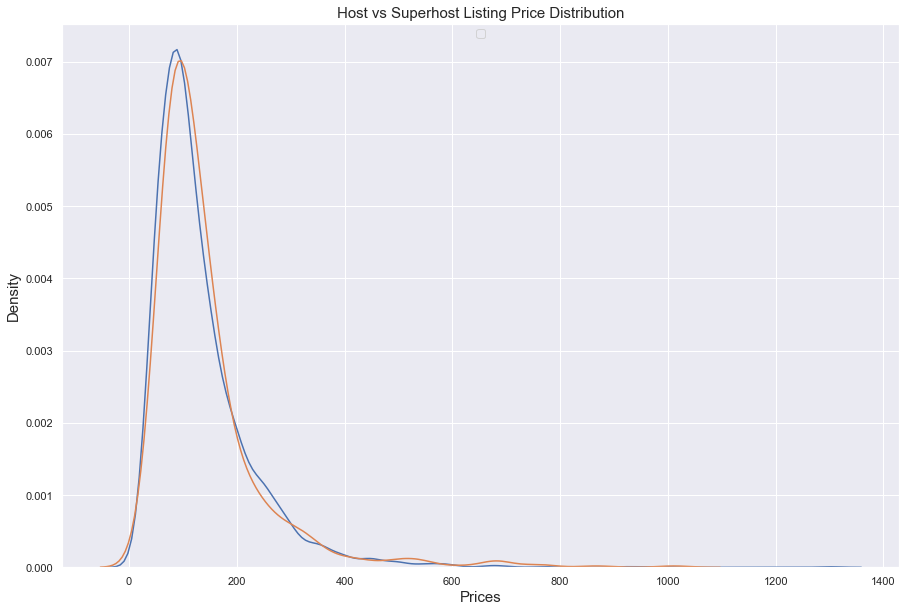

In [27]:
fig, ax = plt.subplots(figsize=[15,10])
ax.set_title('Host vs Superhost Listing Price Distribution', fontsize=15)
ax.set_xlabel(xlabel='Prices', fontsize=15)
ax.set_ylabel(ylabel='Density', fontsize=15)
# ax.plot(host_price_dist, label='Host')
# ax.plot(super_price_dist, label='Superhost')
ax.legend(loc='upper center')
sns.kdeplot(host_price_dist, ax=ax, legend=True)
sns.kdeplot(super_price_dist, ax=ax, legend=True)

- The distributions look about the same. Let's look at the minimum and maximum values for each. 

In [28]:
host_price_dist.loc[host_price_dist.notna()]

0       120.000000
1        82.000000
2        53.944984
3        92.849315
4        85.000000
           ...    
3810     45.000000
3811     40.000000
3812    120.000000
3814    237.904110
3815     43.000000
Name: price_y, Length: 2959, dtype: float64

/Users/starplatinum87/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


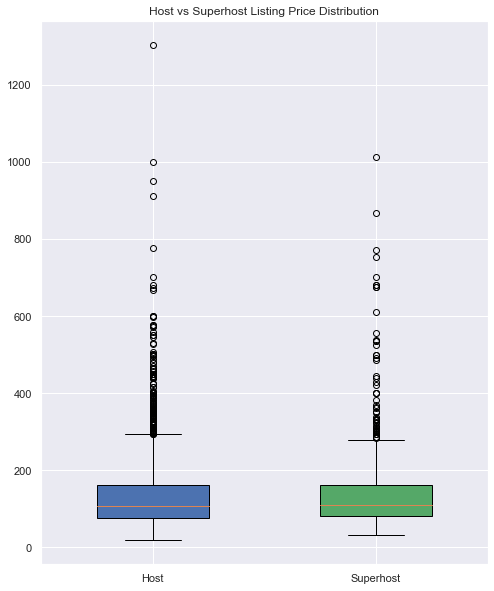

In [33]:
fig, ax  = plt.subplots(figsize=(8, 10))
ax.set_title('Host vs Superhost Listing Price Distribution')
# ax.grid()
bplot = ax.boxplot([host_price_dist.loc[host_price_dist.notna()], super_price_dist.loc[super_price_dist.notna()]], 
                    patch_artist=True, 
                    labels=['Host', 'Superhost'], 
                    widths=0.5);

colors = ['C0', 'C2']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

In [36]:
host_price_dist.describe()

count    2959.000000
mean      133.971985
std        94.328538
min        20.000000
25%        75.000000
50%       107.123288
75%       162.678745
max      1301.818182
Name: price_y, dtype: float64

In [31]:
super_price_dist.describe()

count     762.000000
mean      142.618063
std       108.264957
min        33.000000
25%        81.653303
50%       110.511141
75%       160.564000
max      1010.977716
Name: price_y, dtype: float64

In [37]:
pd.DataFrame({'host_price': host_price_dist.describe(), 'superhost_price': super_price_dist.describe()})

host_price  superhost_price
count  2959.000000       762.000000
mean    133.971985       142.618063
std      94.328538       108.264957
min      20.000000        33.000000
25%      75.000000        81.653303
50%     107.123288       110.511141
75%     162.678745       160.564000
max    1301.818182      1010.977716

- **Normal host listing prices actually have a broader distribution of prices with a higher maximum price**.
- The **median price of both are very close**. 
- Superhost listings do have a somewhat larger standard deviation, which you might expect from a smaller sample size. More variance. 
- Overall it seems like **there is little outlier effect to the mean Superhost listing price**. If anything the **outliers in the normal host pricing may be dragging its mean price up**. 

### Superhosts vs. Normal Hosts Conclusions
- **The occupancy rates of Superhosts and hosts are very close to each other**, within about 1\%, with the occupancy rate of **normal hosts being slightly higher**.
- However, the **mean price of a Superhost listing is notably higher than that of a normal host**, about 8\% higher.
- In examining the distributions of prices, the **higher mean listing price for Superhosts does not seem attributable to outliers skewing the metric**. The **distributions prices of both groups are very close, with normal hosts actually having more outliers than Superhosts**.
- Taking all of this into account it does appear that **Superhosts tend to earn more with their listings than normal hosts** so it may indeed be **worth it to attempt to achieve that status**.
- Of course we don't quite know which one is causing the other, if they are affecting each other at all. There may be other factors that Superhosts tend to have in common that lead to them having higher pricing and equivalent occupancy to normal hosts. We would definitely need to investigate further to draw any further conclusions outside of this association we're seeing in the data. 

# What neighborhoods have the highest occupancy rates?
Knowing where to have a property for an AirBnB residence can be an important decision for hosts to make. Providing that information to them can help hosts be more effective, as well as helping AirBnB know how to focus its promotional efforts.

## Set of neighborhoods
What are the different neighborhoods in Seattle for AirBnB?

In [60]:
listings.neighbourhood.unique()

array(['Queen Anne', nan, 'Ballard', 'Phinney Ridge', 'Fremont',
       'Lower Queen Anne', 'Westlake', 'Wallingford', 'Green Lake',
       'Minor', 'Madrona', 'Harrison/Denny-Blaine', 'Leschi',
       'University District', 'Roosevelt', 'Madison Park', 'Capitol Hill',
       'Atlantic', 'North Beacon Hill', 'Central Business District',
       'Pike Place Market', 'Pike Market', 'Eastlake', 'Portage Bay',
       'South Lake Union', 'Magnolia', 'Belltown',
       'International District', 'Yesler Terrace', 'First Hill',
       'Pioneer Square', 'Gatewood', 'The Junction', 'Arbor Heights',
       'Alki', 'North Admiral', 'Crown Hill', 'Genesee', 'Fairmount Park',
       'Interbay', 'Industrial District', 'Holly Park',
       'South Beacon Hill', 'Greenwood', 'Bitter Lake', 'Fauntleroy',
       'Mount Baker', 'Columbia City', 'Seward Park', 'Brighton',
       'South Delridge', 'Highland Park', 'High Point', 'View Ridge',
       'Windermere', 'Dunlap', 'Rainier Beach', 'North Delridge',
  

- There are actually a lot more than I was expecting. This is good, as it will hopefully allow for more granularity when examining occupancy differences between them. 

## Calculate occupancies per neighborhood
Group by neighborhood and get the mean occupancy 

In [65]:
calendar_listing_df[['neighbourhood', 'rented']].groupby(['neighbourhood']).mean()

available
neighbourhood            
Alki             0.685884
Arbor Heights    0.712329
Atlantic         0.599781
Ballard          0.687144
Belltown         0.621199
...                   ...
Wallingford      0.690104
Wedgewood        0.579726
Westlake         0.691781
Windermere       0.723562
Yesler Terrace   0.871005

[81 rows x 1 columns]

In [82]:
neighborhood_rented_2016 = calendar_listing_df[['neighbourhood', 'rented']].groupby(['neighbourhood']).mean().reset_index()

In [83]:
neighborhood_rented_2016

neighbourhood    rented
0             Alki  0.314116
1    Arbor Heights  0.287671
2         Atlantic  0.400219
3          Ballard  0.312856
4         Belltown  0.378801
..             ...       ...
76     Wallingford  0.309896
77       Wedgewood  0.420274
78        Westlake  0.308219
79      Windermere  0.276438
80  Yesler Terrace  0.128995

[81 rows x 2 columns]

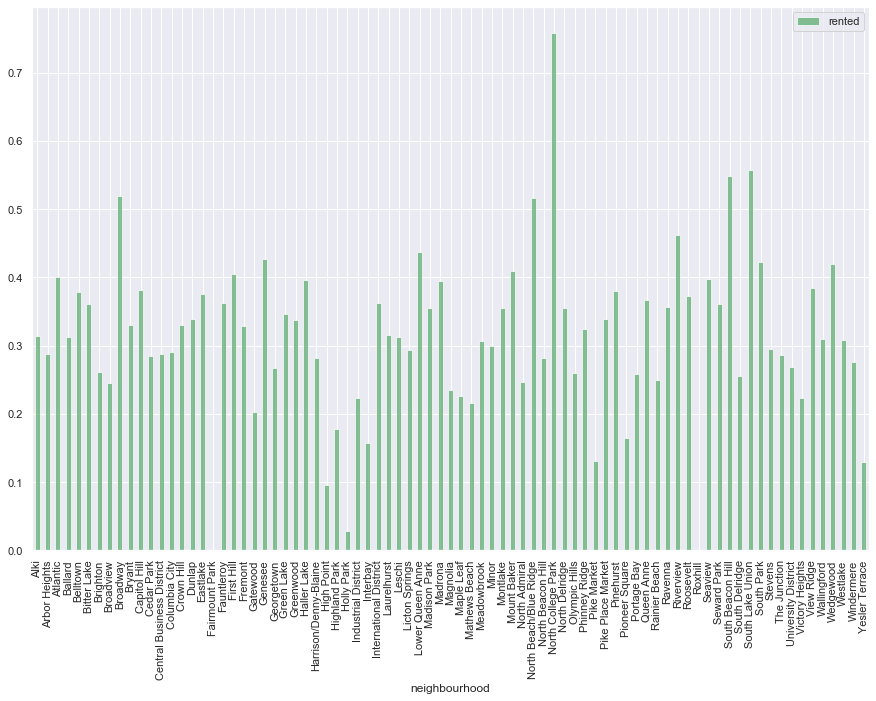

In [115]:
neighborhood_rented_2016.plot(x='neighbourhood', y='rented', kind='bar', figsize=[15,10], color='C2', alpha=0.7);

- There does seem to be a good deal of variability here, but a bar plot makes it tough to see the trend of the data. Sorting by occupancy might help give a better impression. 

## Distribution of occupancy

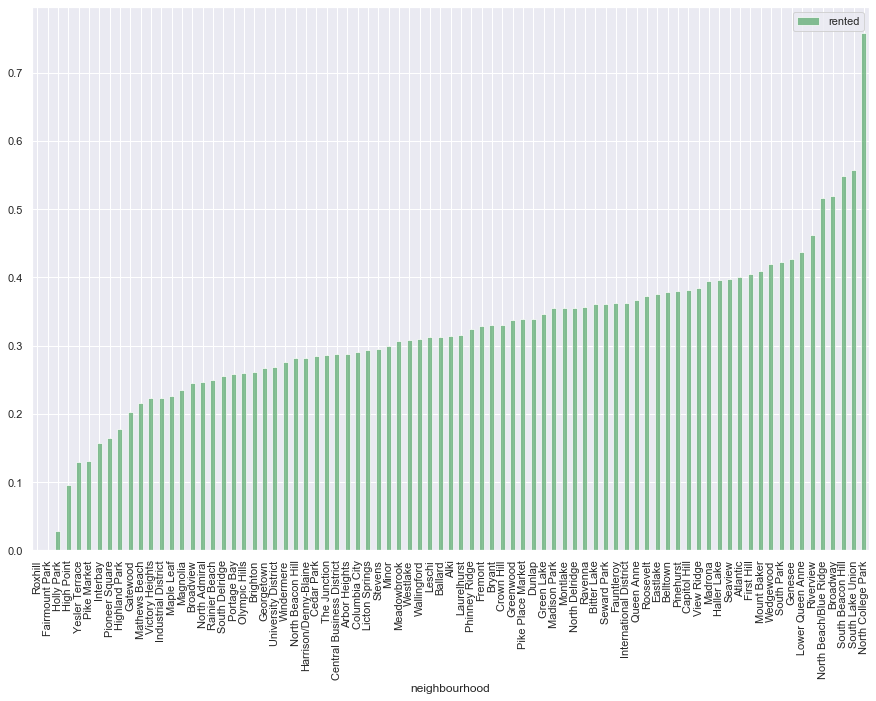

In [116]:
neighborhood_rented_2016.sort_values('rented').plot(x='neighbourhood', 
                                                   y='rented', 
                                                   kind='bar', 
                                                   figsize=[15,10], 
                                                   color='C2',
                                                   alpha=0.7);

- This definitely helps to see the overall trends. There are clear over and underperformers in terms of occupancy. Viewing this as a binned histogram could help as well. 

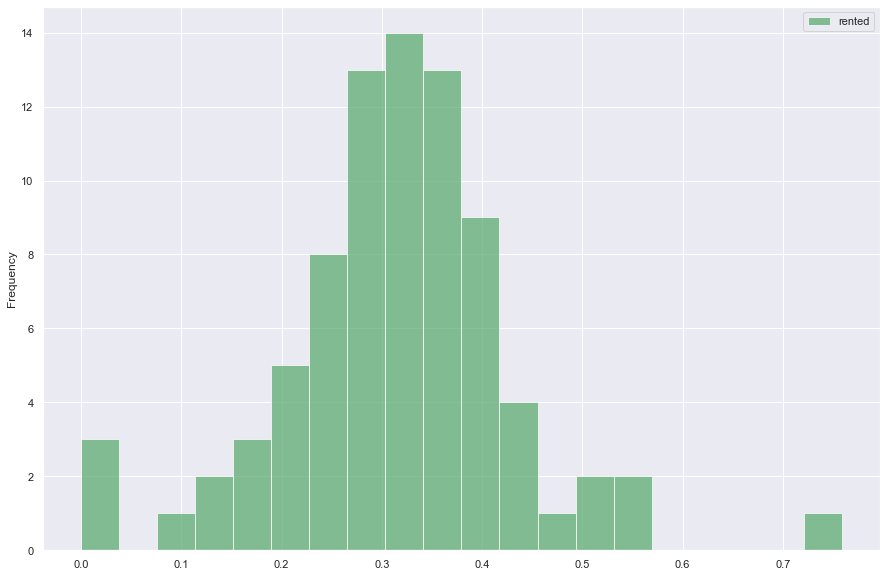

In [122]:
neighborhood_rented_2016.sort_values('rented').plot(x='neighbourhood', 
                                                   y='rented', 
                                                   kind='hist', 
                                                   figsize=[15,10], 
                                                   color='C2',
                                                   alpha=0.7,
                                                   bins=20);

- This is probably the most helpful view. We have occupancy clustering around 30\% over the course of the year with some clear outliers on the high end and low end. 
- What is clear is that **there is definitely a difference between different neighborhoods in terms of occupancy, but most hover in the 20-40\% range.** 

## Highest Occupancy Neighborhoods
There's not a standard way to define the "top occupancy" so we'll look at the histogram to see where there is a distinct spike for the top performers. This seems to be the spike to over 50% occupancy, which would be the top 5 neighborhoods. This also corresponds to around the 95th percentile of occupancy. 

In [167]:
neighborhood_rented_2016.sort_values('rented', ascending=False).iloc[:5]

neighbourhood    rented
50      North College Park  0.758904
69        South Lake Union  0.556817
67       South Beacon Hill  0.547945
8                 Broadway  0.520000
48  North Beach/Blue Ridge  0.517061

## Mean Price vs. Occupancy
Pricing may be a factor in occupancy so it would be good to see what the relationship is between occupancy and mean price of a listing

In [136]:
mean_price_per_neighborhood = calendar_listing_df.loc[:, ['neighbourhood', 'price_y']].groupby(['neighbourhood']).mean().reset_index()

In [ ]:
# Merge price and rented dataframes on the neighborhood name
neighborhood_rented_prices = neighborhood_rented_2016.merge(mean_price_per_neighborhood, on='neighbourhood')

In [140]:
# Sort dataframe by rented rate
neighborhood_rented_prices.sort_values('rented', inplace=True)
neighborhood_rented_prices

neighbourhood    rented     price_y
64                 Roxhill  0.000000   60.000000
17          Fairmount Park  0.000000  370.000000
30              Holly Park  0.027854   78.184594
28              High Point  0.096139   95.961146
80          Yesler Terrace  0.128995  141.037221
..                     ...       ...         ...
48  North Beach/Blue Ridge  0.517061  122.300155
8                 Broadway  0.520000  134.753425
67       South Beacon Hill  0.547945  131.321212
69        South Lake Union  0.556817  186.288490
50      North College Park  0.758904   99.000000

[81 rows x 3 columns]

In [141]:
# Create data for plots
rented = neighborhood_rented_prices.rented
prices = neighborhood_rented_prices.price_y
neighborhoods = neighborhood_rented_prices.neighbourhood

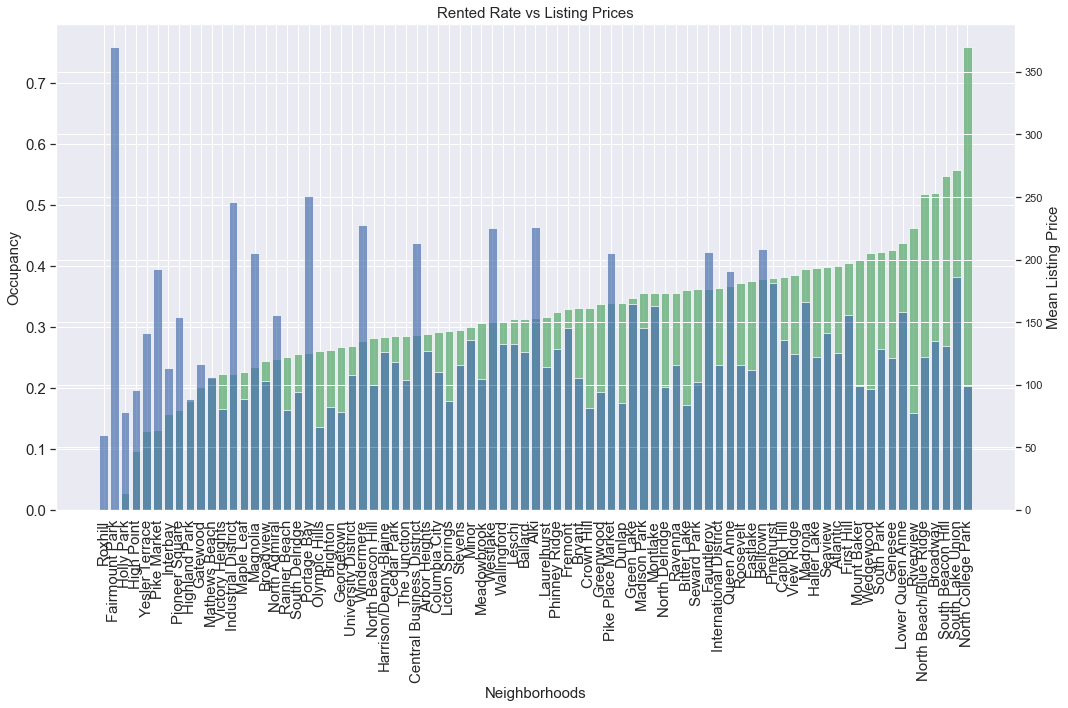

In [148]:
fig, ax1 = plt.subplots(figsize=[15,10])
ax1.bar(neighborhoods, rented, color='C2', alpha=0.7)
ax1.set_ylabel('Occupancy', fontsize=15)
ax1.set_xlabel('Neighborhoods', fontsize=15)
ax1.set_title('Rented Rate vs Listing Prices', fontsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.tick_params(axis='x', labelsize=15, labelrotation=90)

ax2 = ax1.twinx()
ax2.bar(neighborhoods, prices, color='C0', alpha=0.7)
ax2.set_ylabel('Mean Listing Price', fontsize=15)

fig.tight_layout()
plt.show()

- There seems to be no relationship between occupancy and listing price. To take a final look we'll create a scatterplot of pricing vs occupancy.

## Pricing vs Occupancy

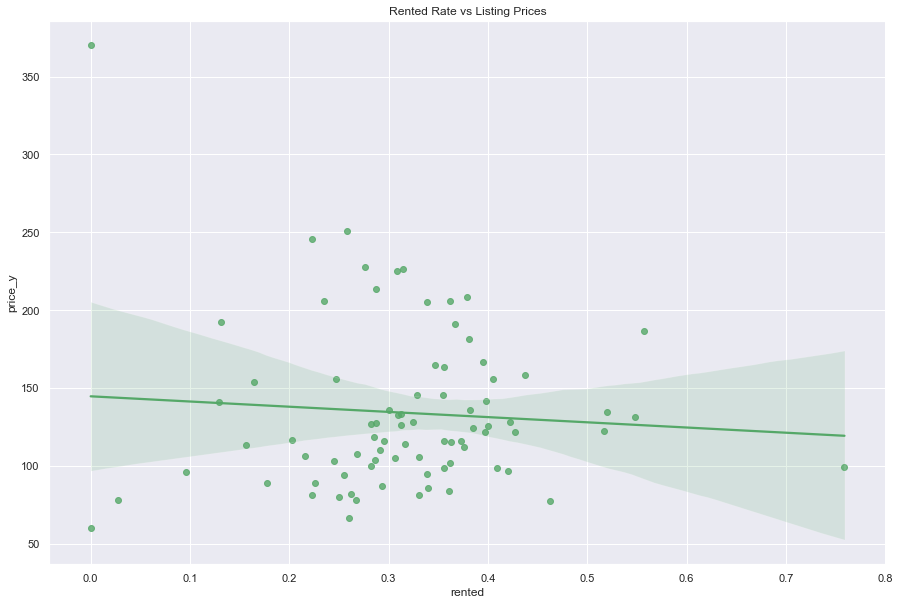

In [161]:
fig, ax = plt.subplots(figsize=[15,10])
ax.set_title('Rented Rate vs Listing Prices')
sns.regplot(x=rented, y=prices, color='C2', ax=ax);

- And this scatterplot with the regression line further confirms this. The line is almost flat, implying there's little relationship between the two variables. 

# Key Questions: Conclusions
1. **What is the overall occupancy trend in Seattle over the course of the year?** 
   - The trends here are fairly easy to understand and unsurprising. There are three distinct periods where we see a dramatic buildup of reservations followed by a leveling off.
   - The three periods of interest are spikes during spring break, July 4th/early summer, and New Year's.
   - The New Year's spike is the largest and there is a dramatic dropoff right before New Year's. This might mean that during the time between Christmas and New Years people leave their AirBnBs after Christmas to return home and then another group (or maybe part of the same group) vacations in AirBnBs for New Year's celebrations. 
   - New Year's is the time we see the greatest spike in occupancy for AirBnB in Seattle, as occupancy never gets close to that level throughout the rest of the year. 
2. **Does it pay to be a Superhost? How do the occupancy, prices and reviews of Superhosts compare to normal hosts?**
   - **The occupancy rates of Superhosts and hosts are very close to each other**, within about 1\%, with the occupancy rate of **normal hosts being slightly higher**, but the **mean price of a Superhost listing is notably higher than that of a normal host**, about 8\% higher.
   - In examining the distributions of prices, the **higher mean listing price for Superhosts does not seem attributable to outliers skewing the metric**. The **distributions prices of both groups are very close, with normal hosts actually having more outliers than Superhosts**.
   - Taking all of this into account it does appear that **Superhosts tend to earn more with their listings than normal hosts**, so it may indeed be **worth it to attempt to achieve that status**.
   - Of course we don't quite know which one is causing the other, if they are affecting each other at all. There may be other factors that Superhosts tend to have in common that lead to them having higher pricing and equivalent occupancy to normal hosts. We would definitely need to investigate further to draw any further conclusions outside of this association we're seeing in the data. 
3. **What neighborhoods have the highest occupancy rates?**
   - The specific neighborhoods with the highest occupancy are:
     - North College Park
     - South Lake Union
     - South Beacon Hill
     - Broadway
     - North Beach/Blue Ridge
   - This is useful information to have, as it can be the basis for further exploration into specific details of these neighborhoods that leads to their occupancy rates, but that is outside the scope of this analysis. We can however explore further explore the occupancy data and its distribution.
   - We have occupancy clustering around 30\% over the course of the year with some clear outliers on the high end and low end. So  **there is definitely a difference between different neighborhoods in terms of occupancy, but most hover in the 20-40\% range**. 
   - Also, in looking at the histogram it looks like occupancy is relatively **normally distributed**. 
   - There seems to be **no relationship between occupancy and listing price** based upon looking at plots of the two variables against each other. 